# Определение перспективного тарифа для телеком-компании

Заказчик предоставил для анализа два тарифных плана: "Смарт" и "Ультра". Для составления рекламного бюджета коммерческий департамент хочет понять, какой тариф приносит больше денег. Были предоставлены данные о пользователях "Мегалайна" по небольшой выборке, состоящей из 500 человек. Данные включают в себя следующую информацию о пользователях: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Цель исследования** - провести анализ поведения клиентов и сделать вывод - какой тариф лучше.

**Ход исследования**

Данные о пользователях "Мегалайна" будут получены из файлов calls.csv, internet.csv, messages.csv, tariffs.csv и users.csv. О качестве данных ничего не известно. Поэтому перед проведением основого анализа необходимо провести предобработку данных.

Таким образом, исследование можно разделить на следующие этапы:

1. Изучение данных из файла.
2. Предобработка данных.
3. Анализ поведения клиентов.
4. Проверка гипотез.

# Содержание
* [Изучение данных из файла](#Изучение-данных-из-файла)
* [Прeдобработка данных](#Предобработка-данных)
* [Анализ поведения клиентов](#Анализ-поведения-клиентов)
* [Проверка гипотез](#Проверка-гипотез)
    * [Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются](#Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются)
    * [Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов)
* [Общий вывод](#Общий-вывод)

## Изучение данных из файла


In [1]:
# импортируем все необходимые для исследования библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# загрузим файлы с данными и сохраним их в переменных
calls_df = pd.read_csv('/datasets/calls.csv') # данные о звонках
internet_df = pd.read_csv('/datasets/internet.csv', index_col=0) # данные о интернете
messages_df = pd.read_csv('/datasets/messages.csv') # данные о сообщениях
tariffs_df = pd.read_csv('/datasets/tariffs.csv') # данные о тарифах
users_df = pd.read_csv('/datasets/users.csv') # данные о пользователях

In [3]:
# выведем на экран первые 5 строк calls_df
calls_df.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# получим общую информацию о данных в таблице calls_df
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
# уменьшим тип столбцов duration и user_id 
calls_df['duration'] = calls_df['duration'].astype('float32')
calls_df['user_id'] = calls_df['user_id'].astype('int32')

In [6]:
# проверим таблицу на наличие дубликатов
calls_df.duplicated().sum()

0

Таблица calls_df состоит из 4 столбцов. В ней встречаются следующие типы данных: object (2), float и int. В столбце call_date необходимо будет заменить формат с object на формат времени и даты. В столбце duration мы видим 0. Это пропущенные звонки - их обрабатывать не надо.

Согласно документации к данным:
- id — уникальный номер звонка;
- call_date — дата звонка;
- duration — длительность звонка в минутах;
- user_id — идентификатор пользователя, сделавшего звонок.

In [7]:
# выведем на экран первые 5 строк internet_df
internet_df.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [8]:
# получим общую информацию о данных в таблице internet_df
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [9]:
# уменьшим тип столбцов mb_used и user_id 
internet_df['mb_used'] = internet_df['mb_used'].astype('float32')
internet_df['user_id'] = internet_df['user_id'].astype('int32')

In [10]:
# проверим таблицу на наличие дубликатов
internet_df.duplicated().sum()

0

Таблица internet_df состоит из 5 столбцов. В ней встречаются следующие типы данных: object (2), float и int. В столбце session_date необходимо будет заменить формат с object на формат времени и даты. 

Согласно документации к данным:
- id — уникальный номер сессии;
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах);
- session_date — дата интернет-сессии; 
- user_id — идентификатор пользователя.

In [11]:
# выведем на экран первые 5 строк messages_df
messages_df.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
# получим общую информацию о данных в таблице messages_df
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица messages_df состоит из 3 столбцов. В ней встречаются следующие типы данных: object (2) и int. В столбце message_date необходимо будет заменить формат с object на формат времени и даты.

Согласно документации к данным:
- id — уникальный номер сообщения;
- message_date — дата сообщения;
- user_id — идентификатор пользователя, отправившего сообщение.

In [13]:
# уменьшим тип столбца user_id
messages_df['user_id'] = messages_df['user_id'].astype('int32')

In [14]:
# проверим таблицу на наличие дубликатов
messages_df.duplicated().sum()

0

Таблица messages_df состоит из 3 столбцов. В ней встречаются следующие типы данных: object (2) и int. В столбце message_date необходимо будет заменить формат с object на формат времени и даты.

Согласно документации к данным:
- id — уникальный номер сообщения;
- message_date — дата сообщения;
- user_id — идентификатор пользователя, отправившего сообщение.

In [15]:
# выведем на экран первые 2 строки tariffs_df
tariffs_df.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
# получим общую информацию о данных в таблице tariffs_df
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [17]:
# уменьшим тип столбцов с int 64 на int 16
columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_minute', 'rub_per_message',
          'rub_per_gb']
for column in columns:
    tariffs_df[column] = tariffs_df[column].astype('int16')

In [18]:
# проверим таблицу на наличие дубликатов
tariffs_df.duplicated().sum()

0

Таблица tariffs_df состоит из 8 столбцов. В ней встречаются следующие типы данных: object и int (7).

Согласно документации к данным:

tariff_name — название тарифа;
rub_monthly_fee — ежемесячная абонентская плата в рублях;
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату;
messages_included — количество сообщений в месяц, включённых в абонентскую плату;
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
rub_per_message — стоимость отправки сообщения сверх тарифного пакета;
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

In [19]:
# выведем на экран первые 5 строк users_df
users_df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [20]:
# получим общую информацию о данных в таблице users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [21]:
# уменьшим тип столбцов user_id и age
users_df = users_df.astype({'user_id': 'int32', 'age': 'int32'})

In [22]:
# проверим таблицу на наличие дубликатов
users_df.duplicated().sum()

0

Таблица users_df состоит из 8 столбцов. В ней встречаются следующие типы данных: object (6) и int (2). В столбце reg_date необходимо будет заменить формат с object на формат времени и даты. 

Согласно документации к данным:
- user_id — уникальный идентификатор пользователя;
- first_name — имя пользователя;
- last_name — фамилия пользователя;
- age — возраст пользователя (годы);
- reg_date — дата подключения тарифа (день, месяц, год);
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
- city — город проживания пользователя;
- tarif — название тарифного плана.

Таким образом, вся информация разбита на 5 таблиц: о звонках, интернете, сообщениях, тарифах и пользователях. Везде требуется замена даты на правильный формат. 

## Предобработка данных

In [23]:
# исправим тип данных в столбцах с датами
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')

В рамках этапа предобработки данных посчитаем следующие показатели для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.
Cперва добавим столбец с месяцем в calls_df, messages_df и internet_df.

In [24]:
# добавим столбец month в указанные выше таблицы
calls_df['month'] = pd.to_datetime(calls_df['call_date']).dt.month
internet_df['month'] = pd.to_datetime(internet_df['session_date']).dt.month
messages_df['month'] = pd.to_datetime(messages_df['message_date']).dt.month
users_df['month'] = pd.to_datetime(users_df['reg_date']).dt.month

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [25]:
# избавимся от 0 в столбце duration, так как недозвоны не сыграют никакой роли в анализе данных
calls_df = calls_df.query('duration > 0')

In [26]:
# округлим секунды до минут
calls_df['duration'] = round(calls_df['duration']).astype('int')

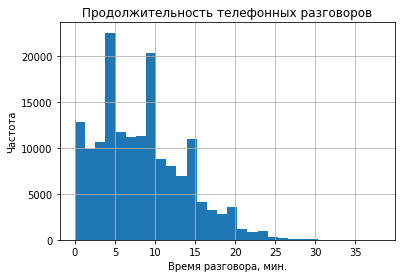

In [27]:
# построим гистрограмму продолжительности телефонных разговоровb
plt.hist(calls_df['duration'], bins=30)
plt.grid()
plt.title('Продолжительность телефонных разговоров')
plt.xlabel('Время разговора, мин.')
plt.ylabel('Частота')
plt.show()

Согласно графику, большинство людей разговаривает около 4 и 9 минут.

In [28]:
# для нахождения количества израсходованных минут разговора по месяцам построим сводную таблицу
calls_pivot = calls_df.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
calls_pivot.columns = ['sum', 'count']
calls_pivot

sum  count
user_id month            
1000    5      149     17
        6      159     28
        7      319     41
        8      391     42
        9      439     46
...            ...    ...
1498    10     230     30
1499    9       64      8
        10     429     44
        11     574     62
        12     467     56

[3168 rows x 2 columns]

Мы видим, что количество минут и звонков у отдельных пользователей от месяца к месяцу может существенно отличаться.

In [29]:
# для нахождения количества отправленных сообщений по месяцам построим сводную таблицу
message_pivot = messages_df.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
message_pivot

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

In [30]:
# переименуем столбец message_date в messages
message_pivot.columns = ['messages']

Для нахождения помесячной выручки с каждого пользователя необходимо создать новую таблицу, которая будет включать в себя необходимые столбцы из других таблиц.

In [31]:
# для нахождения количества расхожованного интернета по месяцам построим сводную таблицу
internet_pivot = internet_df.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_pivot

mb_used
user_id month              
1000    5       2253.489990
        6      23233.769531
        7      14003.639648
        8      14055.929688
        9      14568.910156
...                     ...
1498    10     20579.359375
1499    9       1845.750000
        10     17788.509766
        11     17963.310547
        12     13055.580078

[3203 rows x 1 columns]

In [32]:
# добавим столбец с гигабайтами
internet_pivot['gb_used'] = np.ceil((internet_pivot['mb_used'] / 1024))
internet_pivot

mb_used  gb_used
user_id month                       
1000    5       2253.489990      3.0
        6      23233.769531     23.0
        7      14003.639648     14.0
        8      14055.929688     14.0
        9      14568.910156     15.0
...                     ...      ...
1498    10     20579.359375     21.0
1499    9       1845.750000      2.0
        10     17788.509766     18.0
        11     17963.310547     18.0
        12     13055.580078     13.0

[3203 rows x 2 columns]

In [33]:
# объединим таблицы message_pivot и calls_pivot
call_mes_df = message_pivot.merge(calls_pivot, on=['user_id', 'month'], how='outer')
# объединим таблицы call_mes_df и internet_pivot
all_df = call_mes_df.merge(internet_pivot, on=['user_id', 'month'], how='outer')
# объединим таблицу all_df с информацией о пользователях
all_df = all_df.merge(users_df, on=['user_id', 'month'], how='inner')
all_df

,user_id,month,messages,sum,count,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,149.0,17.0,2253.489990,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1002,6,4.0,111.0,14.0,10856.820312,11.0,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
2,1003,8,37.0,353.0,43.0,8565.209961,9.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
3,1004,5,95.0,32.0,7.0,13403.980469,14.0,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
4,1005,1,7.0,92.0,11.0,2727.969971,3.0,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1469,7,NaN,744.0,88.0,23165.960938,23.0,41,NaN,Сочи,Аксён,Абалкин,2018-07-06,ultra
494,1479,7,NaN,636.0,74.0,25872.720703,26.0,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart
495,1494,8,NaN,248.0,26.0,6590.750000,7.0,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
496,1240,2,NaN,NaN,NaN,959.510010,1.0,30,NaN,Воронеж,Зинаида,Шарова,2018-02-27,ultra


Мы видим, что количество пользователей уменьшилось (в изначальной таблице users_df их было 500 человек). Выведем на экран строчки, которые не попали в объединенную таблицу.

In [34]:
users_df[users_df['user_id'].isin(all_df['user_id'].unique()) == False]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12


Мы видим, что один пользователь пользовался тарифом "Ультра" всего 8 дней, а другой - тарифом "Смарт" 5 дней.

In [35]:
# узнаем количество пропусков в полученной таблице
all_df.isna().sum()

user_id         0
month           0
messages       85
sum             9
count           9
mb_used         4
gb_used         4
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Появление одних пропусков мы описали на первом этапе. Другие могли возникнуть в результате объединения таблиц. Для дальнейших вычислений заменим их на 0.

In [36]:
# заменим NaN на 0 и отсортируем таблицу по возрастанию номера user_id
all_df = all_df.fillna(0).sort_values(by='user_id')
all_df

,user_id,month,messages,sum,count,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,149.0,17.0,2253.489990,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
413,1001,11,0.0,410.0,45.0,18429.339844,18.0,41,0,Москва,Иван,Ежов,2018-11-01,smart
1,1002,6,4.0,111.0,14.0,10856.820312,11.0,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
2,1003,8,37.0,353.0,43.0,8565.209961,9.0,23,0,Москва,Белла,Белякова,2018-08-17,ultra
3,1004,5,95.0,32.0,7.0,13403.980469,14.0,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1495,8,13.0,88.0,13.0,2614.070068,3.0,65,0,Иркутск,Авксентий,Фокин,2018-08-28,ultra
409,1496,1,9.0,45.0,6.0,3762.729980,4.0,36,0,Вологда,Трифон,Блохин,2018-01-27,smart
410,1497,10,20.0,461.0,50.0,11500.290039,12.0,32,0,Челябинск,Каролина,Агеева,2018-10-09,smart
411,1498,7,20.0,168.0,20.0,7476.240234,8.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [37]:
# удалим ненужные столбцы, которые нам не понадобятся для расчет выручки
del all_df['age']
del all_df['churn_date']
del all_df['first_name']
del all_df['last_name']
del all_df['reg_date']
del all_df['mb_used']

In [38]:
# посмотрим на отредактированную таблицу
all_df.head()

,user_id,month,messages,sum,count,gb_used,city,tariff
0,1000,5,22.0,149.0,17.0,3.0,Краснодар,ultra
413,1001,11,0.0,410.0,45.0,18.0,Москва,smart
1,1002,6,4.0,111.0,14.0,11.0,Стерлитамак,smart
2,1003,8,37.0,353.0,43.0,9.0,Москва,ultra
3,1004,5,95.0,32.0,7.0,14.0,Новокузнецк,ultra


Перед тем, как построим функцию для вычисления выручки, переведем Mb в Gb в таблице с тарифами для работы в одной системе координат.

In [39]:
# переведем мегабайты в гигабайты в таблице с тарифами
tariffs_df['gb_per_month_included'] = tariffs_df['mb_per_month_included'] / 1024

In [40]:
# построим функцию для расчета помесячной выручки с каждого пользователя
def income(row):
    messages = row['messages'] # сократим запись, добавив all_df['messages'] в новую переменную
    duration = row['sum'] # сократим запись, добавив all_df['duration'] в новую переменную
    internet = row['gb_used'] # сократим запись, добавив all_df['gb_used'] в новую переменную
    tariff = row['tariff'] # сократим запись, добавив all_df['tariff'] в новую переменную
    # посчитаем количество перерасходования минут, гигабайт и сообщений по тарифу smart
    if tariff == 'smart':
        extra_messages = messages - tariffs_df.loc[0, 'messages_included']
        extra_duration = duration - tariffs_df.loc[0, 'minutes_included']
        extra_internet = internet - tariffs_df.loc[0, 'gb_per_month_included']
        # посчитаем выручку по тарифу smart
        if extra_messages < 0:
            extra_messages = 0
        if extra_duration < 0:
            extra_duration = 0
        if extra_internet < 0:
            extra_internet = 0
        return((tariffs_df.loc[0, 'rub_per_message'] * extra_messages) +
              (tariffs_df.loc[0, 'rub_per_minute'] * extra_duration) +
                (tariffs_df.loc[0, 'rub_per_gb'] * extra_internet) +
              (tariffs_df.loc[0, 'rub_monthly_fee']))
     # посчитаем количество перерасходования минут, гигабайт и сообщений по тарифу ultra
    else:
        extra_messages = messages - tariffs_df.loc[1, 'messages_included']
        extra_duration = duration - tariffs_df.loc[1, 'minutes_included']
        extra_internet = internet - tariffs_df.loc[1, 'gb_per_month_included']
        # посчитаем выручку по тарифу ultra
        if extra_messages < 0:
            extra_messages = 0
        if extra_duration < 0:
            extra_duration = 0
        if extra_internet < 0:
            extra_internet = 0
        return((tariffs_df.loc[1, 'rub_per_message'] * extra_messages) +
              (tariffs_df.loc[1, 'rub_per_minute'] * extra_duration) +
                (tariffs_df.loc[1, 'rub_per_gb'] * extra_internet) +
               (tariffs_df.loc[1, 'rub_monthly_fee']))

In [41]:
# добавим в таблицу all_df с выручкой по каждому тарифу
all_df['income'] = all_df.apply(income, axis=1)
all_df.head()

,user_id,month,messages,sum,count,gb_used,city,tariff,income
0,1000,5,22.0,149.0,17.0,3.0,Краснодар,ultra,1950.0
413,1001,11,0.0,410.0,45.0,18.0,Москва,smart,1150.0
1,1002,6,4.0,111.0,14.0,11.0,Стерлитамак,smart,550.0
2,1003,8,37.0,353.0,43.0,9.0,Москва,ultra,1950.0
3,1004,5,95.0,32.0,7.0,14.0,Новокузнецк,ultra,1950.0


Таким образом, в результате данного этапа анализа данных были изменены типы данны, заменены пропуски, добавлены новые столбцы с месяцами, мегабайты переведены в гигабайты. Также на данном этапе было рассчитано количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам и помесячная выручка с каждого пользователя.

## Анализ поведения клиентов 

Далее рассчитаем, сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц. В этом нам поможет вычисление среднего значения, дисперсии и стандартного отклонения. Гистограммы помогут визуализировать информацию.

In [42]:
# посчитаем среднее и стандартное отклонение для тарифа smart
smart_df = all_df[all_df['tariff'] == 'smart']
smart_df.describe()

,user_id,month,messages,sum,count,gb_used,income
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,1243.771429,6.565714,19.334286,230.720000,27.182857,9.737143,698.237143
std,145.033439,3.417463,20.791080,152.638706,17.812160,5.701208,398.683864
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1119.500000,4.000000,3.000000,104.000000,12.000000,5.000000,550.000000
50%,1235.500000,7.000000,13.000000,211.500000,25.000000,9.000000,550.000000
75%,1371.500000,10.000000,29.000000,327.500000,39.000000,13.000000,552.250000
max,1499.000000,12.000000,103.000000,665.000000,82.000000,26.000000,3158.000000


Пользователь тарифа smart в среднем в месяц отправляет 20 сообщений, разговаривает 230,7 мин. и тратит 9,74 гб. При этом компания в среднем зарабывает с каждого пользователя 698,2 руб. в месяц.
Стандартное отклонение составляет:
- для сообщений - 20,8;
- для продолжительности звонков - 152,6 мин.;
- для расходованных гб - 5,7.
Видим, что есть значительные выбросы в столбцах sum и gb_used.

<div style="border:solid green 2px; padding: 20px"> <b>Отлично:</b><br>
  Мне нравится, что ты видишь за цифрами логику и извлекаешь нужную информацию при анализе!</div>       

In [43]:
# посчитаем дисперсию для тарифа smart
np.var(smart_df)

user_id      20974.599184
month           11.645682
messages       431.033967
sum          23232.007314
count          316.366563
gb_used         32.410908
income      158494.683763
dtype: float64

In [44]:
# создадим словарь с названиями столбцов и названиями графиков для построения гистрограмм с помощью цикла
df_hists_smart = {'messages': 'Количество сообщений', 'sum': 'Продолжительность телефонных разговоров', 'gb_used': 'Количество израсходованного интернета'}

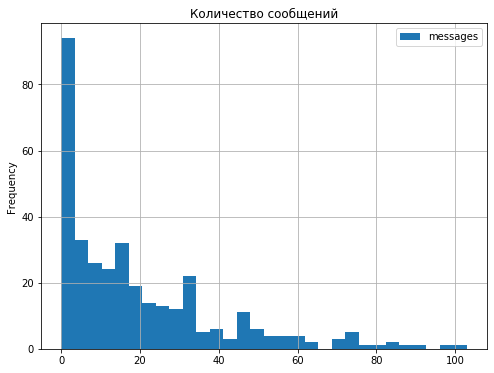

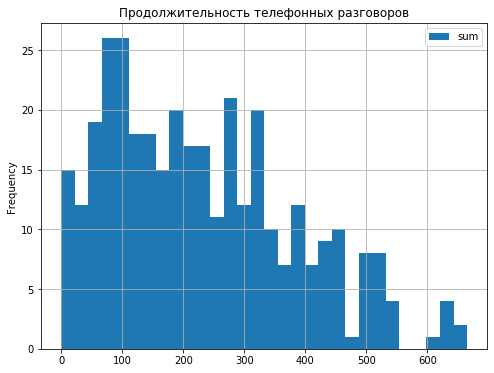

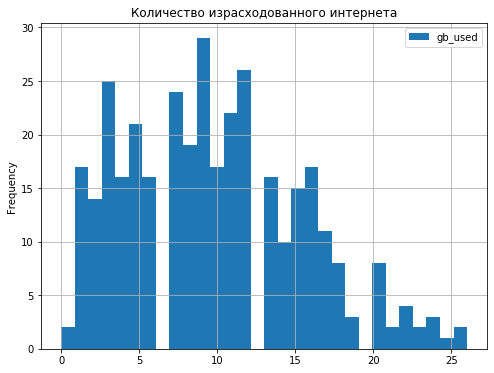

In [45]:
# построим гистограммы четырех параметров
for key in df_hists_smart:
    smart_df.plot(kind='hist', y=key, title=df_hists_smart[key], grid=True, bins=30, figsize=(8, 6))
    

Мы видим, что большинство людей вообще не пользуются сообщениями (скорее всего используют мессенджеры, пользование которыми не может быть учтено в тарифе). Если же пользователи отправляют сообщения, то в большинстве случаев их количество составляет около 15 или 30 шт. Распределение в этом случае похоже на Пуассона, но много значений выбивается из него.

Малая часть людей не пользовалась предоставленными минутами разговора. Возможно, они находились в отпуске и/или использовали другую sim-карту. Распределение данном случае напоминает нормальное. Наиболее встречаемая частота составляет 280-320 минут.

Большое количество людей не пользовалось интернетом. Возможно, в большинстве случаев пользователи использовали wi-fi, который здесь не учитывается. За исключением выбивающегося значения из общей выборки (0), в остальном распределением похоже на распределение Пуассона. Чаще всего пользователи расходуют 0,3 гб в месяц.

In [46]:
# посчитаем среднее и стандартное отклонение для тарифа smart
ultra_df = all_df[all_df['tariff'] == 'ultra']
ultra_df.describe()

,user_id,month,messages,sum,count,gb_used,income
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,1263.047297,6.209459,31.864865,284.128378,33.912162,11.385135,1960.135135
std,143.031861,3.297605,37.016387,252.558373,30.163484,8.259831,75.583773
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1146.750000,3.750000,4.000000,80.750000,9.000000,4.000000,1950.000000
50%,1276.500000,6.000000,20.000000,233.500000,27.500000,10.000000,1950.000000
75%,1379.250000,9.000000,49.250000,420.000000,48.500000,16.250000,1950.000000
max,1495.000000,12.000000,223.000000,1117.000000,140.000000,35.000000,2700.000000


Пользователь тарифа ultra в среднем в месяц отправляет 32 сообщения, разговаривает 284,1 мин. и тратит 11,39 гб. При этом компания в среднем зарабывает с каждого пользователя 1960,14 руб. в месяц, т.е. предоставляемых услуг тарифа хватает практически каждому пользователю, поэтому он не перерасходует минуты, сообщения и гигабайты.
Стандартное отклонение составляет:
- для сообщений - 37;
- для продолжительности звонков - 252,56 мин.;
- для расходованных гб - 8,26.
Видим, что в тарифе "Ультра" значительно меньше выбросов, чем в тарифе "Смарт".

In [47]:
# посчитаем дисперсию для тарифа smart
np.var(ultra_df)

user_id     20319.882898
month          10.800721
messages     1360.954711
sum         63354.747033
count         903.688230
gb_used        67.763832
income       5674.306063
dtype: float64

In [48]:
# создадим словарь с названиями столбцов и названиями графиков для построения гистрограмм с помощью цикла
df_hists_ultra = {'messages': 'Количество сообщений', 'sum': 'Продолжительность телефонных разговоров', 'gb_used': 'Количество израсходованного интернета'}

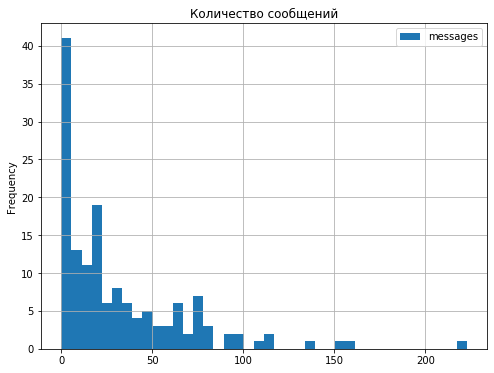

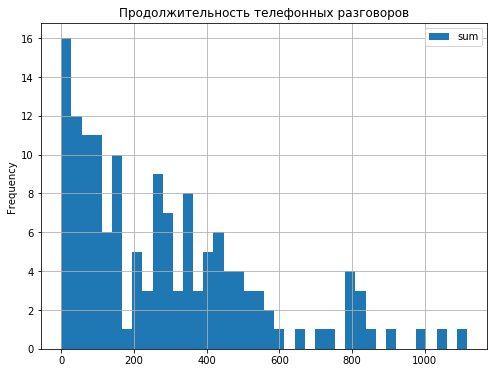

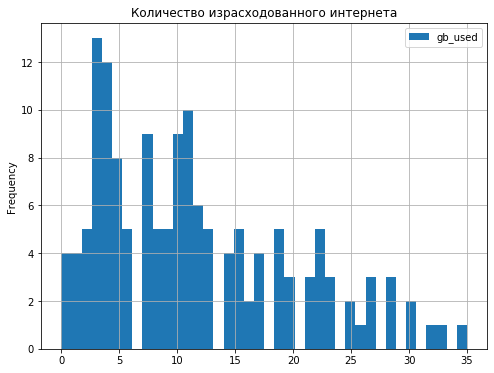

In [49]:
# построим гистограммы четырех параметров
for key in df_hists_ultra:
    ultra_df.plot(kind='hist', y=key, title=df_hists_ultra[key], grid=True, bins=40, figsize=(8, 6))

Графики сообщений, звонков и интернета в тарифе ultra похожи на соответствующие графики в тарифе smart. Здесь также встречается большое количество людей, которые не отправляют сообщения, не звонят и не расходуют интернет-трафик. Согласно графикам, мы видим, что большинство пользователей тарифа ultra еще далеки от максимального расходования предоставляемых тарифом минут, сообщений и гб.

## Проверка гипотез

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind().

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

H0 - разница в средней выручке между пользователями тарифов "Ультра" и "Смарт" статистически не значима.
H1 - разница в средней выручке между пользователями тарифов "Ультра" и "Смарт" статистически значима.
За альфу возьмем значение 0.05 ,то есть при p value < 5% мы отвергаем нулевую гипотезу.

In [50]:
# для определения значения параметра equal_var(True или False) найдем разницу между дисперсиями выборок
var_df1 = (np.var(smart_df['income']) / np.var(ultra_df['income'])) * 100 - 100
var_df1

2693.1994151987806

Разница в дисперсиях намного больше 5%, поэтому параметр equal_var будет равен False.

In [51]:
# проверка гипотезы №1
alpha=0.05
results_1 = st.ttest_ind(smart_df['income'], ultra_df['income'], equal_var=False)
print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 7.881718010465732e-195
Отвергаем нулевую гипотезу


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

H0 - разница в средней выручке между пользователями из Москвы и из других регионов статистически не значима.
H1 - разница в средней выручке между пользователями из Москвы и из других регионов статистически значима.
За альфу возьмем значение 0.05 ,то есть при p value < 5% мы отвергаем нулевую гипотезу.

In [52]:
# для определения значения параметра equal_var(True или False) найдем разницу между дисперсиями выборок
var_df1 = (np.var(all_df[all_df['city']=='Москва']['income']) / np.var(all_df[all_df['city']!='Москва']['income'])) * 100 - 100
var_df1

-3.3175393210733404

Разница в дисперсиях меньше 5%, поэтому параметр equal_var будет равен True.

In [53]:
# проверка гипотезы №2
alpha=0.05
results_2 = st.ttest_ind(all_df[all_df['city']=='Москва']['income'], all_df[all_df['city']!='Москва']['income'], equal_var=True)
print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.7089987815625939
Не получилось отвергнуть нулевую гипотезу


Таким образом, мы отвергаем 1-ю нулевую гипотезу, т.е. разница в средней выручке между пользователями тарифов "Ультра" и "Смарт" статистически значима. 2-ю гипотезу не удалось отвергнуть, т.е. разница в средней выручке между пользователями из Москвы и из других регионов статистически не значима.

## Общий вывод

В процессе анализа тарифов "Мегалайн" было проведено сравнение тарифов "Смарт" и "Ультра". При использовании первого тарифа людям часто не хватает минут, сообщений и гигабайтов интернета, т.е. пользователи выходят за рамки тарифа и доплачивают перерасходы. С тарифом "Ультра" наблюдается противоположная картина - пользователи не успевают расходовать за месяц весь трафик. Таким образом, в качестве рекомендаций можно предложить поднять цену 1-го тарифа, включив туда дополнительные минуты, сообщения и интернет, и уменьшить цену 2-го тарифа, сократив количество минут, сообщений и интернет-трафика. Средний доход по тарифу "Смарт" составляет 698,2 руб., а ежемесячная плата - 550 руб. Т.е. в среднемесячный перерасход составляет 148,2 руб. Средний доход по тарифу "Ультра" составляет 1960,1 руб., а ежемесячная плата - 1950 руб. Т.е. в среднемесячный перерасход составляет 10,1 руб. 
Также в результате проверки гипотез мы установили, что разница между средней выручкой двух тарифов статистически значима. Интересным фактом является то, что разница в средней выручке между Москвой и другими регионами статистически не значима.